### Gradient descent 

<img src='images/1.gif'>



- is an optimization algorithm used to find the values of parameters (coefficients) of a
  function (f) that minimizes a cost function (cost).

- enables a model to learn the gradient or direction that the model should take in order to 
  reduce errors (differences between actual y and predicted y).
  
  
Direction in the simple linear regression example refers to how the model parameters b0 and b1 should be tweaked or corrected to further reduce the cost function.


In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in linear regression and weights in neural networks. 

### Cost function

A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters.

<img src="images/cf.png" width='60%'/>

### Learning rate

it tell us  how quickly we want to move towards the minimum. 

<img src="images/lr.jpeg" width="50%"/>

- If the learning rate is too small, the optimisation will need to be run a lot of times (taking a long time and potentially never reaching the optimum).


- If the learning rate is too big then the optimisation may be unstable (bouncing around the optimum, and maybe even getting worse rather than better).

<img src="images/GD_new.PNG"/>

To solve for the gradient,

we iterate through our data points using our new m and n values and compute the partial derivatives.

This new gradient tells us the slope of our cost function at our current position (i.e. parameters) and 

the direction we should move to update our parameters. The size of our update is controlled by the learning rate. 

<img src="images/update_wt.png"/>

- Gradient descent can be slow to run on very large datasets.


- The cost is calculated for a machine learning algorithm over the entire training dataset for each iteration of the gradient descent algorithm. 


- One iteration of the algorithm is called one batch and this form of gradient descent is referred to as batch gradient descent.

### Stochastic Gradient Descent (SGD)

when you have large amounts of data, we can use  stochastic gradient descent.


update to the coefficients is performed for each training instance, rather than at the end of all the instances.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
x_points = [1,1,2,3,4,5,6,7,8,9,10,11]
y_points = [1,2,3,1,4,5,6,4,7,10,15,9]

In [11]:
X = np.array(x_points)
Y = np.array(y_points)

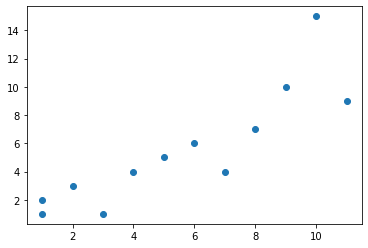

In [12]:
plt.scatter(X,Y)

In [16]:
from IPython.display import clear_output
def draw(x1,y1, p):
    plt.plot(x1,y1,'r',label=p)
    plt.legend()
    plt.pause(.1)
    clear_output(wait=True)
def gradient_descent(x,y,m_current=0, b_current=0, iters=100, learning_rate=.001):
    df = pd.DataFrame(columns=['m','b','cost'])
    N = len(x)
    
    for i in range(iters):
        y_pred = (m_current*x)+b_current
        cost = sum([error**2 for error in (y-y_pred)])
        
        m_gradient = -(2/N)*sum(x*(y-y_pred))
        b_gradient = -(2/N)*sum(y-y_pred)
        
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate*b_gradient)
        
        plt.scatter(X,Y)
        
        l = 'm:{} b:{} '.format(m_current, b_current)
        draw(x, y_pred, l)
        df.loc[i] = [m_current, b_current, cost]
        
    return df

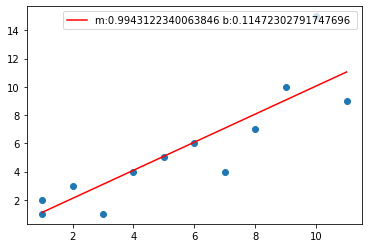

In [17]:
data = gradient_descent(X,Y)

In [18]:
data.head()

m         b        cost
0  0.085333  0.011167  563.000000
1  0.163331  0.021358  477.943378
2  0.234625  0.030658  406.884980
3  0.299790  0.039144  347.521032
4  0.359354  0.046884  297.926909

### Plot Cost at n iterations

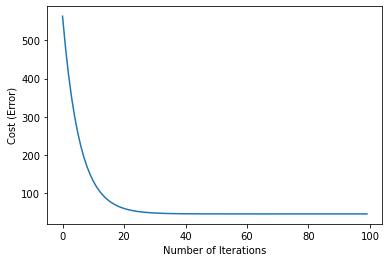

In [19]:
data['cost'].plot()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (Error)')
plt.show()

In [23]:
data[data['cost']==data['cost'].min()]

m         b       cost
99  0.994312  0.114723  46.144122